## TP3: Un peu d'analyse de données

On va faire un peu d'analyse de données, avec ou sans numpy et ses matrices.

Au passage, on va voir comment faire un peu de visualisation en Python, en utilisant le module
matplotlib (librairie en plus, mais disponible avec tous les outils scientifiques)

La commande essentielle, plot, prend deux listes de coordonnées (abscisses et ordonnées), et trace la courbe correspondante reliant les points. Spyder gère automatiquement l'affichage dans sa console IPython.

**Ce TP sera à rendre** cf le devoir sur moodle qui sera ouvert 

**Utilisez le notebook** ce sera plus simple pour tester + mettre vos analyses/commentaires

In [1]:
%matplotlib inline
from IPython.display import Image

Parabole:


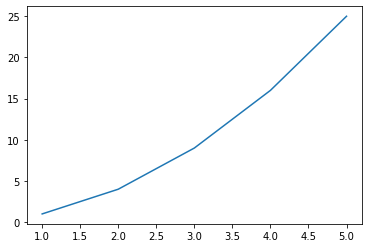

In [2]:
import matplotlib.pyplot as plt

plt.plot([1,2,3,4,5],[1,4,9,16,25])
print("Parabole:")

En option, on peut définir une couleur et une forme avec une chaine en 3e argument ("r" pour red, "o" pour un point)

Parabole


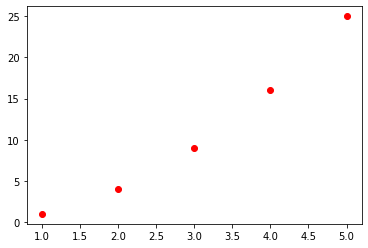

In [3]:
plt.plot([1,2,3,4,5],[1,4,9,16,25],"ro")
print("Parabole")

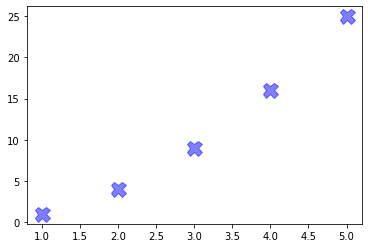

In [4]:
#quelques variantes
plt.plot([1,2,3,4,5],[1,4,9,16,25],"bX",markersize=15,alpha=0.5)
print()

Pour contrôler un peu l'affichage, on peut fixer les extrémités des axes, et les forcer à être à la même échelle

Parabole encore


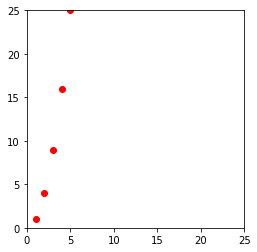

In [5]:
plt.axes().set_aspect('equal')
plt.xlim(0,25)
plt.ylim(0,25)

plt.plot([1,2,3,4,5],[1,4,9,16,25],"ro")
print("Parabole encore")

### Première partie: classification 

Passons maintenant aux choses sérieuses. On va considérer que l'on a des données de deux types différents (appelons les "rouge" et "bleu"), caractérisées par deux valeurs entre 0 et 1. 
On pourrait alors avoir une visualisation comme ceci: 

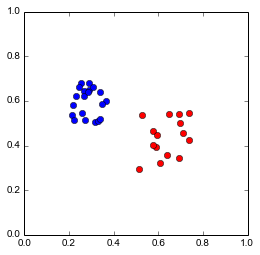

In [6]:
Image(filename="TP/blobs2.png")

Le but de ce TP est de définir un moyen de "classer" une nouvelle donnée pour dire si elle est plutôt de la classe bleue ou rouge. 
Pour cela, un moyen simple (voire simplet, mais vous creuserez la question au 2e semestre), est de calculer le barycentre
(centre de gravité) des points de chaque classe, ici en jaune: 
<img src="TP/blobs2_centres.png">

Puis de considérer leur médiatrice: 
<img src="TP/blobs2_separateur.png">

En enfin de considérer que tout ce qui est du même côté que le groupe bleu/rouge doit être bleu/rouge:
<img src="TP/classif_barycentre.png">

Evidemment, ça ne marchera pas pour tout type de données: 
<img src="TP/classif_ouch.png">

Cette méthode nécessite que les données soit séparables linéairement. Mais passons. 
Votre tâche: 

1. en utilisant la fonction random.random(), faire une fonction qui génère un "nuage" de n points autour d'une position donnée ($x_0$,$y_0$), avec un étalage réglable (distance maxi par rapport à la position donnée). Par exemple, la figure initiale a été générée avec les paramètres (vous être libre du nom de la fonction):
     > g1 = blob(0.3,0.6,20,scale=0.1)
     
     > g2 = blob(0.6,0.4,15,scale=0.15) 
 
     La fonction renvoie juste les coordonnées. 
     
     Ecrivez aussi une fonction qui prend la sortie de "blob" et fait la figure du nuage en utilisant plt.plot
 
2. Ecrivez une fonction qui détermine le centre d'un groupe
 

In [7]:
import random

def gen_nuage(x0,y0,n,etalage):
    i=0
    l=[]
    while i<n:
        x=x0-etalage+random.random()*2*etalage
        y=y0-etalage+random.random()*2*etalage
        coord=(x,y)
        l.append(coord)
        i=i+1
    return l

def init_graph():
    plt.axes().set_aspect('equal')
    plt.xlim(0,1)
    plt.ylim(0,1)
    
def affich_nuage(liste,couleur):
    x_coord,y_coord = zip(*liste)
    plt.plot(x_coord,y_coord,couleur + "o")

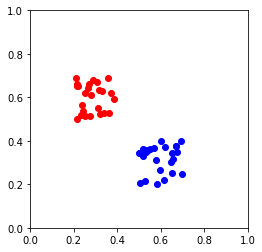

In [8]:
init_graph()
liste_points1 = gen_nuage(0.3,0.6,25,0.1)
liste_points2 = gen_nuage(0.6,0.3,25,0.1)
affich_nuage(liste_points1,"r")
affich_nuage(liste_points2,"b")

  Voici une fonction qui calcule le séparateur de deux groupes (la médiatrice): pour cela il suffit de renvoyer un point de la droite, par exemple le milieu M des centres des 2 groupes, et un vecteur normal à la droite $\vec{w}$ (par exemple le vecteur défini par les deux centres). La fonction suppose que la fonction "centre" a déjà été écrite, 
  et que g1, g2, c1 et c2 sont des vecteurs ou matrices numpy. Adaptez si vous avez fait différemment pour les fonctions blob et centre. 
  
La fonction qui affiche le séparateur est donnée aussi

In [9]:
import numpy as np

def centre(groupe):
    x_coord,y_coord = zip(*groupe)
    xmoy=np.mean(x_coord)
    ymoy=np.mean(y_coord)
    return (xmoy,ymoy)

def separateur(g1,g2):
    """renvoie le milieu du segment qui relie les centres de g1 et g2, et un vecteur directeur de la médiatrice"""
    c1 = centre(g1)
    c2 = centre(g2)
    m = (0.5*(c1[0]+c2[0]),0.5*(c1[1]+c2[1]))
    return (m,(c1[0]-c2[0],c1[1]-c2[1]))
    
def plot_separateur(m,w,scale=2):
    """à partir d'un point M et un vecteur directeur w, trace un segment de la droite correspondante
    (échelle/scale à ajuster selon la figure)
    """
    tw = (-w[1],w[0])
    plt.plot([m[0]+scale*tw[0],m[0]-scale*tw[0]],[m[1]+scale*tw[1],m[1]-scale*tw[1]],"y-")  

((0.4400724186247811, 0.4593569418163168), (-0.3129563201681824, 0.2805844636785551))


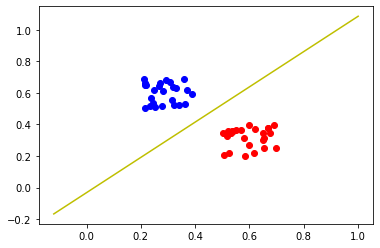

In [10]:
affich_nuage(liste_points1,"b")
affich_nuage(liste_points2,"r")
mediatrice = separateur(liste_points1,liste_points2)
print(mediatrice)
plot_separateur(mediatrice[0],mediatrice[1])

Ceci devrait vous aider à générer une figure similaire à celle-ci: 
    <img src="TP/blobs2_separateur.png">

  
  3. Ecrivez une fonction qui classifie un point P par rapport à cette droite: ici le critère est déterminé par rapport à l'angle entre $\vec{MP}$ et $\vec{w}$, soit $cos(\vec{MP},\vec{w})>0$ (ou inférieur), ou encore
  $\vec{MP}\cdot\vec{w}>0$ (ou inférieur).
  
  Ensuite générer des points au hasard avec des coordonnées entre 0 et 1, et afficher les comme des croix (symbole 'x') avec la couleur correspondant à la classe prédite par la fonction précédente.
  
 

In [11]:
def classification(point,M,w):
    vect = (point[0]-M[0],point[1]-M[1])
    if np.dot(vect,w)>0:
        return "G1"
    else:
        return "G2"
    
def affich_group(groupe,P):
    if groupe == "G1":
        plt.plot(P[0],P[1],"bx")
    else:
        plt.plot(P[0],P[1],"rx")

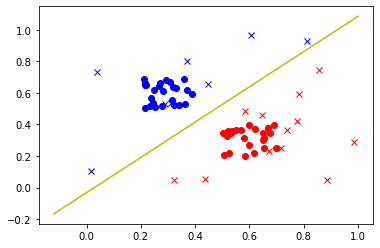

In [12]:
liste_pclass = gen_nuage(0.5,0.5,20,0.5)

affich_nuage(liste_points1,"b")
affich_nuage(liste_points2,"r")
mediatrice = separateur(liste_points1,liste_points2)
plot_separateur(mediatrice[0],mediatrice[1])

for x in liste_pclass:
    res = classification(x,mediatrice[0],mediatrice[1])
    affich_group(res,x)

Bonus: vous pouvez essayer aussi avec des données "tordues", cf certains jeux de test de la librairie scikit-learn (et faire un peu de numpy !)

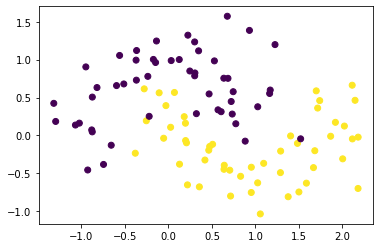

In [13]:
from sklearn.datasets import make_moons, make_circles
d = make_moons(noise=0.3, random_state=0)
xy, c = d
plt.scatter(xy[:,0],xy[:,1],c=c)

### Deuxième partie: de "vraies" données

Vous pouvez maintenant utiliser le fichier "iris.txt", en annexe du sujet. Celui-ci contient des caractéristiques de différentes fleurs de l'espèce iris, réparties en trois sous-espèces "setosa", "virginica", "versicolor". 

Vous pouvez utiliser numpy pour lire directement les données: 

In [14]:
import numpy as np
data = np.genfromtxt('iris.txt', dtype=None,delimiter=',',names=True,encoding=None)

Si on regarde le résultat, on voit que cela donne une matrice de tuples, avec les caractéristiques et la classe de chaque instance. On a aussi une liste de noms des "colonnes" de ces données: 

In [15]:
data[:4]

array([(5.1, 3.5, 1.4, 0.2, 'Iris-setosa'),
       (4.9, 3. , 1.4, 0.2, 'Iris-setosa'),
       (4.7, 3.2, 1.3, 0.2, 'Iris-setosa'),
       (4.6, 3.1, 1.5, 0.2, 'Iris-setosa')],
      dtype=[('sepal_l', '<f8'), ('sepal_w', '<f8'), ('petal_l', '<f8'), ('petal_w', '<f8'), ('classe', '<U15')])

On peut alors récupérer les colonnes par leur nom: 

In [16]:
data["classe"][:10]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa'], dtype='<U15')

In [17]:
data["sepal_l"][:10]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9])

A vous de jouer, pour: 
    
   1. Faire une fonction qui affiche 2 caractéristiques choisies sur ces données, donnant une couleur différente à chaque groupe. Utilisez les fonctionalités de numpy. Par exemple: <img src="TP/iris_test.png">
   2. Appliquer la première partie pour trouver des séparateurs des données, en considérant qu'il faut un séparateur pour chaque groupe par rapport aux deux autres ensembles (toujours restreint à deux caractéristiques).
    Trouver les 2 meilleures caractéristiques à prendre pour une bonne séparation. 
   3. Tester vos "modèles" en calculant les séparateurs avec un sous-ensemble aléatoire des données, et en évaluant s'ils classent correctement les données restantes. 
       
       
Et voilà, vous avez fait votre premier programme qui apprend automatiquement ...

In [18]:
from colorama import Fore, Back, Style

def add_to_dico(dico,key,val):
    if key not in dico:
        dico[key]=[val]
    else :
        dico[key].append(val)
    return dico

def trier_groupe(donnee,caract1,caract2):
    dico={}
    list=[]
    i=0
    for x in donnee["classe"]:
        tuple1=(donnee[caract1][i,],donnee[caract2][i,])
        dico=add_to_dico(dico,x,tuple1)
        i=i+1
    return dico

def afficher_par_groupe(dico):
    nbR=0
    nbG=0
    nbB=0
    for key,val in dico.items():
        if key == "Iris-setosa":
            for i in val:
                plt.plot(i[0],i[1],"bo")
                nbB = nbB+1
        elif key == "Iris-versicolor":
            for i in val:
                plt.plot(i[0],i[1],"ro")
                nbR = nbR+1
        elif key == "Iris-virginica":
            for i in val:
                plt.plot(i[0],i[1],"go")
                nbG = nbG+1
        else:
            print ("Erreur type non reconnu")
            
    print(Fore.BLUE + "Iris-setosa nb : " + str(int(nbB/2)))
    print(Fore.RED + "Iris-versicolor nb : " + str(int(nbR/2)))
    print(Fore.GREEN + "Iris-virginica nb : " + str(int(nbG/2)))

Iris-setosa nb : 25
Iris-versicolor nb : 25
Iris-virginica nb : 25


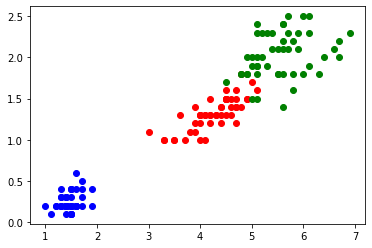

In [19]:
#Affiche les deux caractéristiques pétal

dico1 = trier_groupe(data,"petal_l","petal_w")
afficher_par_groupe(dico1)

In [20]:
def separateur_triple(g1add,g2add,g3minus):
    c1 = centre(g1add+g2add)
    c2 = centre(g3minus)
    m = (0.5*(c1[0]+c2[0]),0.5*(c1[1]+c2[1]))
    return (m,(c1[0]-c2[0],c1[1]-c2[1]))

def classification3groupes(point,M1,w1,M2,w2):
    vect1 = (point[0]- M1[0],point[1]-M1[1])
    vect2 = (point[0]- M2[0],point[1]-M2[1])
    if ((np.dot(vect1,w1)>0) and (np.dot(vect2,w2)<=0)):
        return "G1"
    elif ((np.dot(vect1,w1)<=0) and (np.dot(vect2,w2)>0)):
        return "G2"
    else:
        return "G3"
    
def affich_3group(groupe,P):
    if groupe == "G1":
        plt.plot(P[0],P[1],"bx")
    elif groupe == "G2":
        plt.plot(P[0],P[1],"gx")
    else:
        plt.plot(P[0],P[1],"rx")
        
        
def choix_donnees_aleatoire(dico_entree): ##Permet de prendre un sous-ensemble aléatoire de données et de creer un dictionnaire avec les autres points a placer
    i=0
    dico_sortie1 = {}
    dico_sortie2 ={}
    for key,val in dico_entree.items():
        if (key == "Iris-setosa"):
            for x in val:
                rand=random.choice([True, False])
                if (rand==True):
                    dico_sortie1 = add_to_dico(dico_sortie1,key,x)
                else:
                    dico_sortie2 = add_to_dico(dico_sortie2,key,x)
            
        elif (key == "Iris-versicolor"):
            for x in val:
                rand=random.choice([True, False])
                if (rand==True):
                    dico_sortie1 = add_to_dico(dico_sortie1,key,x)
                else:
                    dico_sortie2 = add_to_dico(dico_sortie2,key,x)
            
        elif (key == "Iris-virginica"):
            for x in val:
                rand=random.choice([True, False])
                if (rand==True):
                    dico_sortie1 = add_to_dico(dico_sortie1,key,x)
                else:
                    dico_sortie2 = add_to_dico(dico_sortie2,key,x)
            
    return dico_sortie1,dico_sortie2

Iris-setosa nb : 25
Iris-versicolor nb : 25
Iris-virginica nb : 25


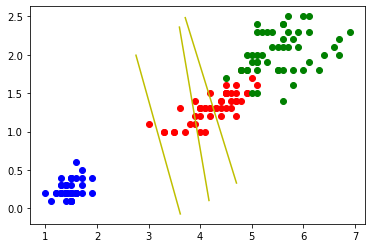

In [21]:
#Modèle 1

afficher_par_groupe(dico1)

mediatrice1 = separateur_triple(dico1["Iris-setosa"],dico1["Iris-versicolor"],dico1["Iris-virginica"])
mediatrice2 = separateur_triple(dico1["Iris-setosa"],dico1["Iris-virginica"],dico1["Iris-versicolor"])
mediatrice3 = separateur_triple(dico1["Iris-versicolor"],dico1["Iris-virginica"],dico1["Iris-setosa"])
plot_separateur(mediatrice1[0],mediatrice1[1],0.4)
plot_separateur(mediatrice2[0],mediatrice2[1],1.5)
plot_separateur(mediatrice3[0],mediatrice3[1],0.3)

Iris-setosa nb : 10
Iris-versicolor nb : 6
Iris-virginica nb : 10


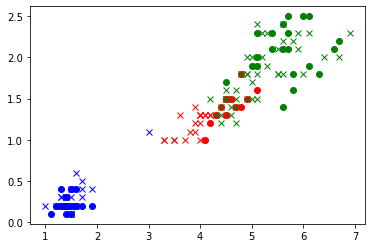

In [22]:
#Test Modèle1

dico_rand_val,dico_reste_val=choix_donnees_aleatoire(dico1)
afficher_par_groupe(dico_rand_val)

for val in dico_reste_val.values():
    for x in val:
        groupe = classification3groupes(x,mediatrice1[0],mediatrice1[1],mediatrice3[0],mediatrice3[1])
        affich_3group(groupe,x)

Iris-setosa nb : 25
Iris-versicolor nb : 25
Iris-virginica nb : 25


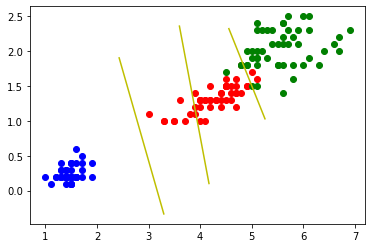

In [23]:
#Modèle 2
#recalcul des mediatrices en prenant le centre entre le groupe rouge et vert pour la mediatrice3 et le centre entre le groupe rouge et bleu pour la mediatrice1

afficher_par_groupe(dico1)

mediatrice1new = separateur(dico1["Iris-setosa"],dico1["Iris-versicolor"])
mediatrice3new = separateur(dico1["Iris-virginica"],dico1["Iris-versicolor"])

plot_separateur(mediatrice1new[0],mediatrice1new[1],0.4)
plot_separateur(mediatrice2[0],mediatrice2[1],1.5)
plot_separateur(mediatrice3new[0],mediatrice3new[1],0.5)

Iris-setosa nb : 13
Iris-versicolor nb : 11
Iris-virginica nb : 10


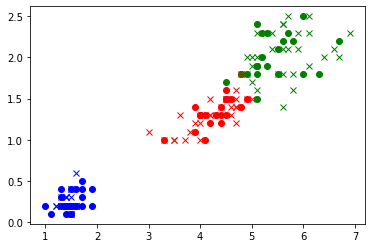

In [24]:
#Test Modèle2

dico_rand_val,dico_reste_val=choix_donnees_aleatoire(dico1)
afficher_par_groupe(dico_rand_val)

for val in dico_reste_val.values():
    for x in val:
        groupe = classification3groupes(x,mediatrice1new[0],mediatrice1new[1],mediatrice3new[0],mediatrice3new[1])
        affich_3group(groupe,x)

In [25]:
#Cette decoupe (avec ces séparateurs) est seulement optimisée pour les caractéristiques choisis, si on change les caractéristiques pour des points plus confondus, le premier modèle sera le mieux